<a href="https://colab.research.google.com/github/shakin-shahria/Python_programming/blob/main/offline5(k_means_clustering).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

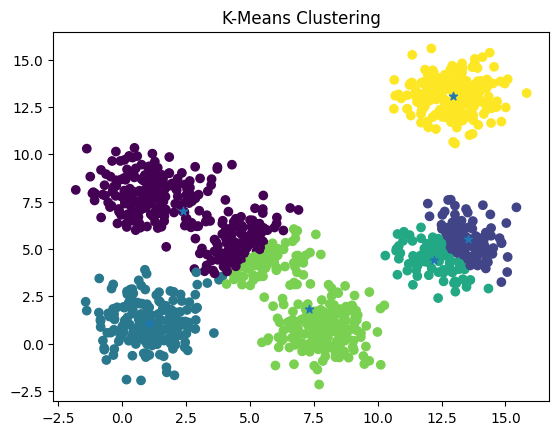

In [ ]:
#011201055
import math
import numpy as np
from matplotlib import pyplot as plt

# Load data.csv into a 2D numpy array
path = 'data.csv'
data = np.genfromtxt(path, delimiter=',')

# Manually input the value of k
k_value = 6






# Define the K-Means clustering function
def k_means_clustering(dataset, k):
    # n is the number of samples
    n = dataset.shape[0]

    # Randomly choose initial cluster centers
    cluster_centers = dataset[np.random.choice(n, k, replace=False)]

    # Initialize cluster lists to store data indices for each cluster
    clusters = [[] for _ in range(cluster_centers.shape[0])]

    # Temporary clusters to track changes during each iteration
    temp_clusters = [[] for _ in range(cluster_centers.shape[0])]

    iteration = 0

    while True:
        # Clear temporary clusters at the start of each iteration
        temp_clusters = [[] for _ in range(cluster_centers.shape[0])]

        # Calculate distance between samples and centers.
        distance = np.zeros((n, k))
        for i in range(k):
            distance[:, i] = ((dataset - cluster_centers[i])**2).sum(axis=1) ** 0.5

        # Find the index of the closest center for each sample
        closest_center_indices = np.argmin(distance, axis=1)

        for sample_idx, center_idx in enumerate(closest_center_indices):
            # Append sample index to the temporary cluster
            temp_clusters[center_idx].append(sample_idx)

        # Calculate new centers by determining the mean of each cluster
        for i in range(k):
            cluster_centers[i] = dataset[closest_center_indices == i].mean(axis=0)

        iteration += 1

        if iteration > 1:
            # Initializing an array to track shifts
            shifts = np.zeros(dataset.shape[0], dtype=bool)

            for idx, sample in enumerate(dataset):
                # Check if cluster assignments have changed
                if clusters != temp_clusters:
                    shifts[idx] = True

            # Count the total shifts
            shift_count = np.sum(shifts)

            # If data didn't change much, break the loop
            if shift_count < 10:
                clusters = temp_clusters.copy()
                break

        # Update cluster assignments
        clusters = temp_clusters.copy()

    # Visualize clusters and centers using scatter plot
    plt.scatter(dataset[:, 0], dataset[:, 1], c=closest_center_indices)
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='*')
    plt.title('K-Means Clustering')
    plt.show()

# Call the k_means_clustering function with data and the manually set k value
k_means_clustering(data, k_value)
